In [1]:
# Needs installing through anaconda
# conda install -c conda-forge wbgapi
import pandas as pd
import numpy as np
from matplotlib import pyplot as plot
import seaborn as sb
import plotly.express as px
import wbgapi as wb

wb.source.info()
#wb.economy.info(wb.income.members('LIC'))   Low income
#wb.economy.info(wb.income.members('HIC'))   High income

# BM.GSR.TOTL.CD	Imports of goods, services and primary income (BoP, current US$)
# BM.GSR.TRAN.ZS	Transport services (% of service imports, BoP)
# BX.GRT.TECH.CD.WD	Technical cooperation grants (BoP, current US$)
# TX.VAL.OTHR.ZS.WT	Computer, communications and other services (% of commercial service exports)
# TX.VAL.SERV.CD.WT	Commercial service exports (current US$)
# TX.VAL.TECH.CD	High-technology exports (current US$)
# EG.ELC.ACCS.ZS	Access to electricity (% of population)
# FP.CPI.TOTL.ZG    inflation


#wb.series.info(db=2)

id,name,code,concepts,lastupdated
1,Doing Business,DBS,3,2021-08-18
2,World Development Indicators,WDI,3,2022-12-22
3,Worldwide Governance Indicators,WGI,3,2022-09-23
5,Subnational Malnutrition Database,SNM,3,2016-03-21
6,International Debt Statistics,IDS,4,2022-12-06
11,Africa Development Indicators,ADI,3,2013-02-22
12,Education Statistics,EDS,3,2020-12-20
13,Enterprise Surveys,ESY,3,2022-03-25
14,Gender Statistics,GDS,3,2022-06-23
15,Global Economic Monitor,GEM,3,2020-07-27


In [2]:
# Chosing Europe & Central Asia as our focus in this project in Europe

worldBankData = wb.data.DataFrame('NY.GDP.PCAP.CD', 
                                  economy= wb.region.members('ECS'),
                                  time = range(2000,2019), 
                                  numericTimeKeys = True,
                                  labels = True)
worldBankData

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
economy,,,,,,,,,,,,,,,,,,,,
GEO,Georgia,749.908535,801.990414,853.516454,1010.007980,1305.047486,1642.760938,1996.057129,2635.353882,3324.735879,2822.667430,3233.295943,4021.743306,4421.818242,4623.745725,4739.188338,4014.185944,4062.169888,4357.000936,4722.042423
BEL,Belgium,23098.886508,23015.071263,25006.191397,30655.209268,35429.407793,36809.701340,38705.106796,44319.165449,48303.397956,44760.291244,44184.946354,47410.566928,44670.560685,46757.951856,47764.071512,41008.296719,42012.622719,44198.482391,47544.981147
IRL,Ireland,26334.567205,28282.409882,32705.434557,41203.529585,47754.202319,50933.021610,54329.161860,61396.417461,61353.106563,52133.090616,48663.600444,52183.132931,49054.697434,51546.354763,55643.059434,62053.984438,62895.911124,69970.948915,79250.387852
SRB,Serbia,914.785720,1727.281196,2283.846685,3005.426352,3502.802924,3720.479155,4382.617279,5848.476405,7101.040141,6169.114195,5735.422857,6809.159804,6015.945228,6755.073675,6600.056809,5588.980728,5765.200762,6292.543629,7252.401858
CZE,Czechia,6029.038193,6637.041657,8060.868703,9818.568493,11749.852664,13430.669896,15261.797591,18466.547930,22804.577677,19861.697430,19960.068487,21871.266075,19870.801212,20133.169143,19890.919906,17829.698322,18575.232027,20636.199952,23424.480460
BLR,Belarus,1276.288034,1244.373185,1479.314583,1819.766059,2378.623286,3125.810535,3847.434124,4735.657608,6377.369732,5352.583912,6033.686239,6527.173869,6953.132515,7998.125239,8341.399679,5967.052204,5039.681886,5785.670673,6360.062473
MCO,Monaco,81561.245912,83801.883430,91675.014489,111440.805315,128363.118873,130770.174964,143169.170995,184392.319415,203266.913745,168255.709299,161782.675663,179372.763684,165505.178100,185066.578133,195780.006893,170337.924413,174610.636972,173612.864622,194280.822141
NLD,Netherlands,26214.498550,26896.548111,29343.244996,35750.974663,40436.618231,41994.713531,44900.938144,51799.208552,57879.943755,52722.213057,50999.745117,54230.312903,50070.141605,52198.897561,52900.537415,45193.403219,46039.105928,48675.222335,53044.532435
MDA,Moldova,440.538684,507.404076,570.799866,682.319096,897.178495,1034.394030,1183.021031,1531.221862,2110.561990,1898.435485,2436.799359,2941.362119,3044.808478,3321.043917,3327.786775,2731.065584,2879.391291,3509.647340,4232.206888


<AxesSubplot: title={'center': 'Income growth in Europe Area (First 10)'}>

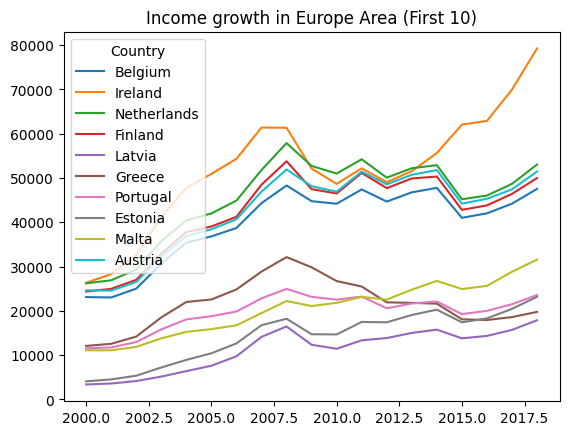

In [3]:
wb.data.DataFrame('NY.GDP.PCAP.CD', economy= wb.region.members('EMU'), #EMU ECS
                  time = range(2000,2019),
                  numericTimeKeys= True,
                  labels= True).head(10).set_index('Country').transpose().plot(title='Income growth in Europe Area (First 10)')


<AxesSubplot: title={'center': 'Income growth in Europe and Central Asia (First 10)'}>

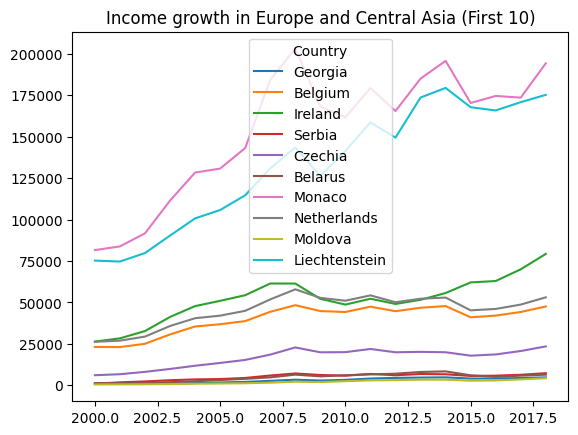

In [4]:
wb.data.DataFrame('NY.GDP.PCAP.CD', economy= wb.region.members('ECS'), #EMU ECS
                  time = range(2000,2019),
                  numericTimeKeys= True,
                  labels= True).head(10).set_index('Country').transpose().plot(title='Income growth in Europe and Central Asia (First 10)')

Text(0.5, 1.0, 'First 5 Service Countries')

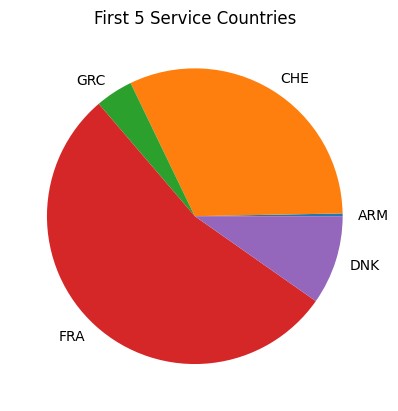

In [5]:
# servicesData = wb.data.DataFrame('BM.GSR.TOTL.CD', economy= wb.region.members('ECS'),time = range(2000,2019),numericTimeKeys= True,labels= True)
# servicesData.to_csv('WorldBankSets/servicesData.csv')

servicesData = pd.read_csv('WorldBankSets/servicesData.csv')

servicesDataHead = servicesData.dropna().head(5)
servicesDataTail = servicesData.dropna().tail(5)

figure, axisPie = plot.subplots()
#Configuring plot
axisPie.pie(servicesDataHead['2016'], labels=servicesDataHead['economy'])
plot.title("First 5 Service Countries")

In [6]:
servicesData.dropna().head(5)

,economy,Country,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,ARM,Armenia,1.030659e+09,1.123380e+09,1.261236e+09,1.602745e+09,2.008567e+09,2.520291e+09,3.035898e+09,4.334334e+09,...,4.442602e+09,5.127971e+09,5.623305e+09,5.823563e+09,6.053637e+09,6.177956e+09,4.876717e+09,5.071907e+09,6.265807e+09,7.389479e+09
2,CHE,Switzerland,1.717128e+11,1.718590e+11,1.662654e+11,1.933379e+11,2.258790e+11,2.718791e+11,2.984769e+11,3.780284e+11,...,3.749258e+11,4.252819e+11,5.281153e+11,5.131408e+11,5.433291e+11,5.533445e+11,5.079254e+11,5.414977e+11,5.792589e+11,6.185142e+11
3,GRC,Greece,4.538276e+10,4.492498e+10,4.464547e+10,5.687299e+10,7.033805e+10,7.768473e+10,9.448237e+10,1.200712e+11,...,1.031674e+11,9.617879e+10,1.021443e+11,7.669258e+10,8.881099e+10,9.149181e+10,7.205579e+10,6.979583e+10,7.993808e+10,9.499507e+10
4,FRA,France,4.376243e+11,4.356795e+11,4.562742e+11,5.452624e+11,6.506062e+11,7.289758e+11,8.306789e+11,9.809961e+11,...,8.493145e+11,9.035674e+11,1.039119e+12,9.864401e+11,1.012602e+12,1.036688e+12,9.148685e+11,9.178887e+11,9.914052e+11,1.100991e+12
5,DNK,Denmark,8.041232e+10,7.891772e+10,8.492077e+10,9.688992e+10,1.140384e+11,1.343947e+11,1.571539e+11,1.885829e+11,...,1.593277e+11,1.612491e+11,1.864460e+11,1.779784e+11,1.866096e+11,1.888706e+11,1.666232e+11,1.656179e+11,1.808977e+11,2.021441e+11


In [7]:
#Tree map that shows gdps of countries (all)
fig = px.treemap(servicesData,path = ['Country'],values = '2018')

# title_x is used for the place of the title (0.5 center)
fig.update_layout(title='Services Tree Map of All Countries',title_x=0.5)
fig.show()

Text(0.5, 1.0, 'Last 10 GDP ($ per capita) Countries')

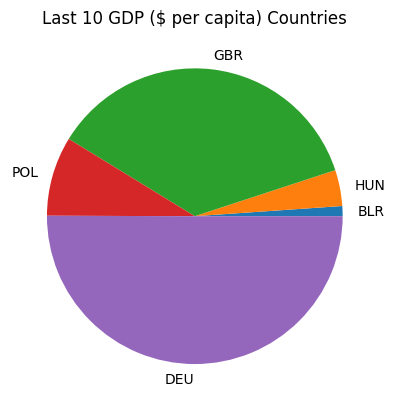

In [8]:
figure, axisPie = plot.subplots()
#Configuring plot
axisPie.pie(servicesDataTail['2016'], labels=servicesDataTail['economy'])
plot.title("Last 10 GDP ($ per capita) Countries")

In [9]:
# techData = wb.data.DataFrame('TX.VAL.OTHR.ZS.WT', economy= wb.region.members('ECS'),time = range(2000,2019),numericTimeKeys= True,labels= True)
# techData.to_csv('WorldBankSets/techData.csv')

techData = pd.read_csv('WorldBankSets/techData.csv')

fig = px.treemap(techData,path = ['Country'],values = "2017")
fig.update_layout(title='Computer, communications and other services',title_x=0.5)
fig.show()

In [10]:
# Creating filters to be used in melting process

techData.head(5)
filterIta= (techData.Country == 'Italy')
filterTur = (techData.Country == 'Turkiye')
italyData = techData[filterIta].reset_index(drop = True)
turkeyData = techData[filterTur].reset_index(drop = True)

filterHun= (techData.Country == 'Hungary')
filterSlo = (techData.Country == 'Slovakia')
hungaryData = techData[filterHun].reset_index(drop = True)
slovakiaData = techData[filterSlo].reset_index(drop = True)

# Melting the data years to be in only one column
turkeyData_Converted = pd.melt(frame=turkeyData, id_vars='Country', value_vars=techData.columns.tolist()[1:], var_name='years', value_name='service_rate')
italyData_Converted = pd.melt(frame=italyData, id_vars='Country', value_vars=techData.columns.tolist()[1:], var_name='years', value_name='service_rate')
hungaryData_Converted = pd.melt(frame=hungaryData, id_vars='Country', value_vars=techData.columns.tolist()[1:], var_name='years', value_name='service_rate')
slovakiaData_Converted = pd.melt(frame=slovakiaData, id_vars='Country', value_vars=techData.columns.tolist()[1:], var_name='years', value_name='service_rate')

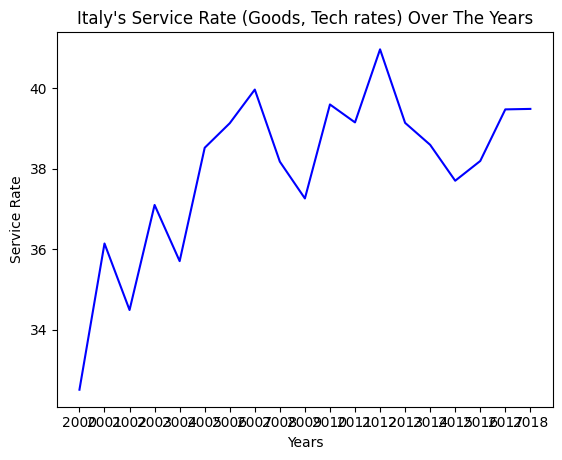

In [11]:
fig = plot.figure()
plot.rcParams["figure.figsize"] = [11.5, 4.5]
plot.rcParams["figure.autolayout"] = True

x = italyData_Converted['years']
y = italyData_Converted['service_rate']
plot.plot(x, y, color='blue')
plot.title("Italy's Service Rate (Goods, Tech rates) Over The Years")
plot.xlabel("Years")
plot.ylabel("Service Rate")
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
plot.show()

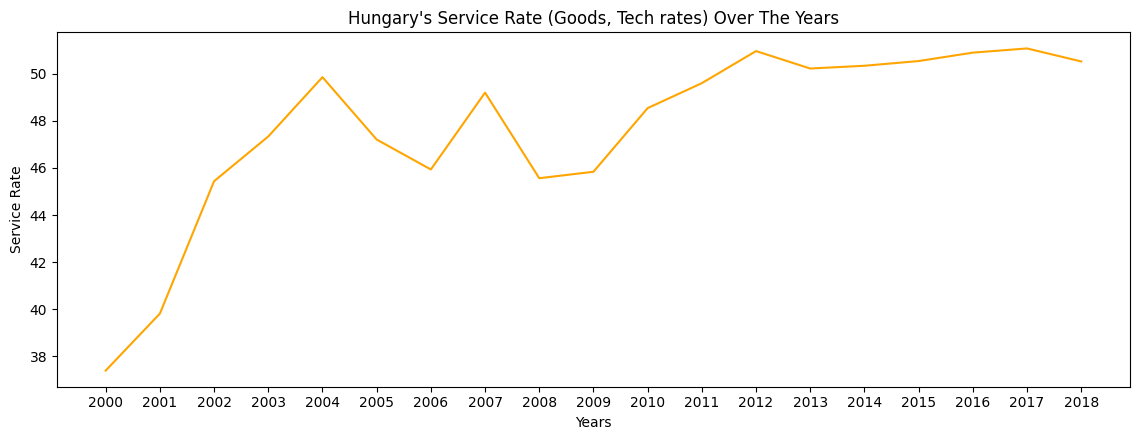

In [12]:
fig = plot.figure()
plot.rcParams["figure.figsize"] = [11.5, 4.5]
plot.rcParams["figure.autolayout"] = True

x = hungaryData_Converted['years']
y = hungaryData_Converted['service_rate']
plot.plot(x, y, color='orange')
plot.title("Hungary's Service Rate (Goods, Tech rates) Over The Years")
plot.xlabel("Years")
plot.ylabel("Service Rate")
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
plot.show()

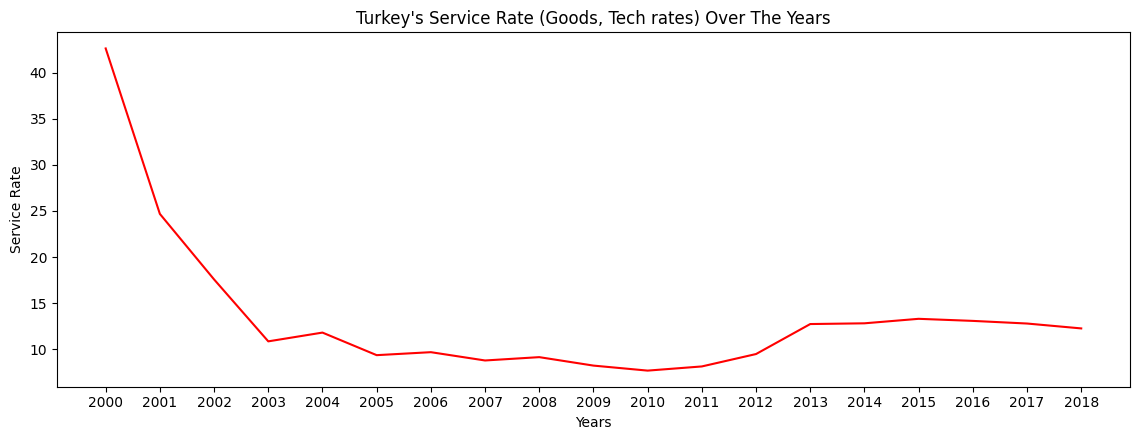

In [13]:
fig = plot.figure()
plot.rcParams["figure.figsize"] = [11.5, 4.5]
plot.rcParams["figure.autolayout"] = True

x = turkeyData_Converted['years']
y = turkeyData_Converted['service_rate']
plot.plot(x, y, color='red')
plot.title("Turkey's Service Rate (Goods, Tech rates) Over The Years")
plot.xlabel("Years")
plot.ylabel("Service Rate")
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
plot.show()

In [14]:
# commercialData = wb.data.DataFrame('TX.VAL.SERV.CD.WT', economy= wb.region.members('ECS'), time = range(2000,2019),numericTimeKeys= True,labels= True)
# commercialData.to_csv('WorldBankSets/commercialData.csv')

commercialData = pd.read_csv('WorldBankSets/commercialData.csv')


fig = px.treemap(commercialData,path = ['Country'],values = "2018")
fig.update_layout(title='Commercial service exports',title_x=0.5)
fig.show()


In [15]:
#inflationData = wb.data.DataFrame('FP.CPI.TOTL.ZG', time = range(2000,2019),numericTimeKeys= True,labels= True)
#inflationData.to_csv('WorldBankSets/inflationData.csv')

inflationData = pd.read_csv('WorldBankSets/inflationData.csv')

fig = px.choropleth(inflationData,  
                    locations= "economy",
                    color='2018',
                    hover_name="Country",
                    #animation_frame="years",
                    title = "Yearly Inflation Rates",
                    color_continuous_scale="Sunsetdark",
                    projection = 'equirectangular')

fig.update_geos(fitbounds="locations")
fig.update_layout(margin={'r':0,'t':50,'l':0,'b':0})
fig.show()

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('WorldBankSets/inflationData.csv')
df = df.dropna()

scaler = StandardScaler()
data = scaler.fit_transform(df.drop(['Country', 'economy'], axis=1))

pca = PCA()
pca.fit(data)

transformed_data = pca.transform(data)

print(pca.explained_variance_ratio_)

[0.49133749 0.13631664 0.08206594 0.0583773  0.04548612 0.03932987
 0.02556366 0.02458482 0.02086216 0.0178078  0.0133847  0.01215455
 0.00827483 0.00592346 0.0047863  0.00442126 0.00355956 0.00299872
 0.00276481]


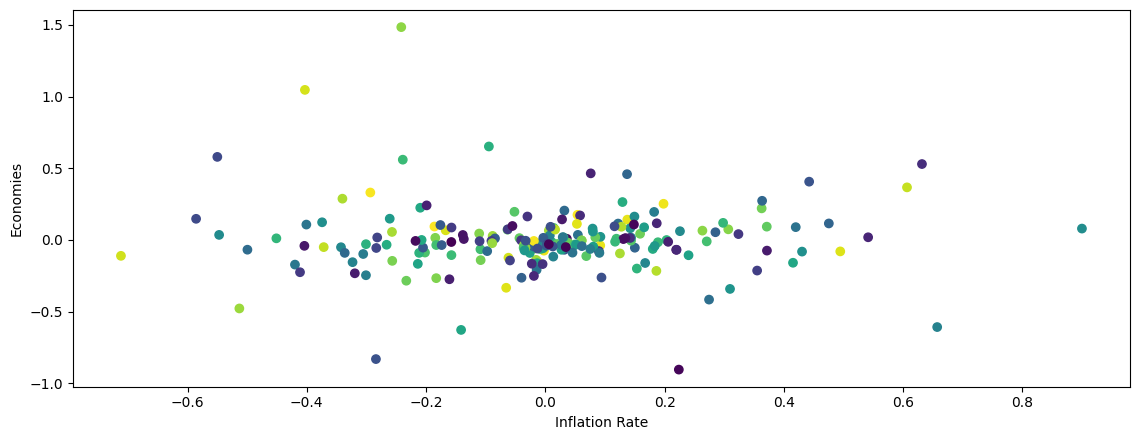

In [17]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

components = transformed_data[:, -2:]

economy = df['economy']

le = LabelEncoder()
economy_integer = le.fit_transform(economy)

plot.scatter(components[:, 0], components[:, 1], c=economy_integer)
plot.xlabel('Inflation Rate')
plot.ylabel('Economies')
plot.show()

Text(0.5, 1.0, 'Last Five Countries That Has Access To Electricity')

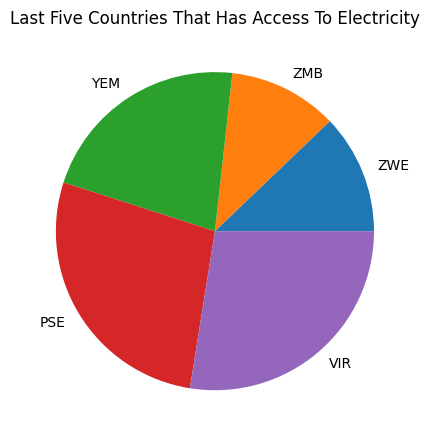

In [18]:
#electricityData = wb.data.DataFrame('EG.ELC.ACCS.ZS', time = range(2000,2019),numericTimeKeys= True,labels= True)
#electricityData.to_csv('WorldBankSets/electricityData.csv')

electricityData = pd.read_csv('WorldBankSets/electricityData.csv')

electricityDataHead = electricityData.dropna().head(5)
electricityDataTail = electricityData.dropna().tail(5)

figure, axisPie = plot.subplots()
#Configuring plot
axisPie.pie(electricityDataHead['2017'], labels=electricityDataHead['economy'])
plot.title("Last Five Countries That Has Access To Electricity")

Text(0.5, 1.0, 'First Five Countries That Has Access To Electricity')

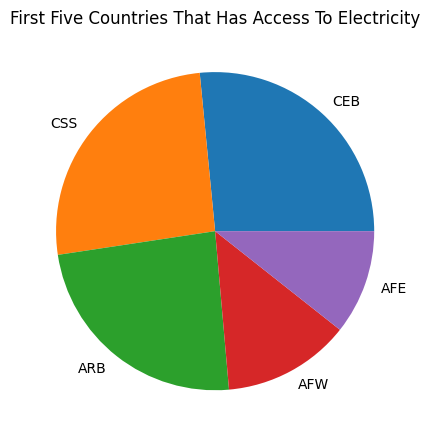

In [19]:
figure, axisPie = plot.subplots()
#Configuring plot
axisPie.pie(electricityDataTail['2017'], labels=electricityDataTail['economy'])
plot.title("First Five Countries That Has Access To Electricity")

In [20]:
#wb.economy.info(wb.income.members('LIC'))   Low income
#wb.economy.info(wb.income.members('HIC'))   High income

# BM.GSR.TOTL.CD	Imports of goods, services and primary income (BoP, current US$)
# BM.GSR.TRAN.ZS	Transport services (% of service imports, BoP)
# BX.GRT.TECH.CD.WD	Technical cooperation grants (BoP, current US$)
# TX.VAL.OTHR.ZS.WT	Computer, communications and other services (% of commercial service exports)
# TX.VAL.SERV.CD.WT	Commercial service exports (current US$)
# TX.VAL.TECH.CD	High-technology exports (current US$)
# EG.ELC.ACCS.ZS	Access to electricity (% of population)
# FP.CPI.TOTL.ZG    inflation

#wb.series.info(db=2)